# Homework 1 



1) Median age of the houses in the block (in years)
2) Total number of rooms in a given block
3) Number of bedrooms in a given block
4) Population in the block
5) Number of households in the block
6) Median household income in the block (in thousands of dollars)
7) Proximity to the ocean (rated on a scale from 0 = closest to 4 = farthest)
8) Median house value in the block (in dollars)(outcome)

## Loading the data and Libraries

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


data = pd.read_csv('housingUnits.csv')
data.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,223,322,126,208.1300,1,452600
1,21,7099,1338,2401,1138,207.5350,1,358500
2,52,1467,328,496,177,181.4350,1,352100
3,52,1274,293,558,219,141.0775,1,341300
4,52,1627,357,565,259,96.1550,1,342200


# 1. Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and why are predictor variables 4 and 5 probably not very useful by themselves to predict median house values in a block?

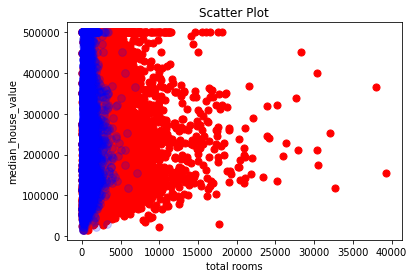

In [3]:


# Create two data series with random values
x_rooms = data['total_rooms']
x_bed = data['total_bedrooms']
y = data['median_house_value']

# Create a scatter plot of the data
plt.figure()
plt.scatter(x_rooms, y, s=50, c='red')
plt.scatter(x_bed, y, s=60, c='blue',alpha=0.2)

# Set the axis labels and title
plt.xlabel('total rooms')
plt.ylabel('median_house_value')
plt.title('Scatter Plot')



# Display the plot
plt.show()

In [4]:


# Generate some sample data
x =np.array(data['total_rooms']).reshape(-1,1)
y = np.array(data['median_house_value'])

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(x, y)

# Predict y for a new set of x values
# x_new = np.array([6, 7, 8]).reshape((-1, 1))
# y_new = model.predict(x_new)

# Print the model coefficients and predicted values
print("Model Coefficients: ", model.coef_)
# print("Predicted Values: ", y_new)

Model Coefficients:  [7.09597221]


### **Answer 1:**

1) What did i do in the code to answer this question:

2) why did I answer this question this way and not in another way. why this is a suitable approach ?

3) What was my finding ?

4) Answer to the original question and interpretation of the findings 

# 2. To meaningfully use predictor variables 2 (number of rooms) and 3 (number of bedrooms), you will need to standardize/normalize them. Using the data, is it better to normalize them by population (4) or number of households (5)?

<Figure size 432x288 with 0 Axes>

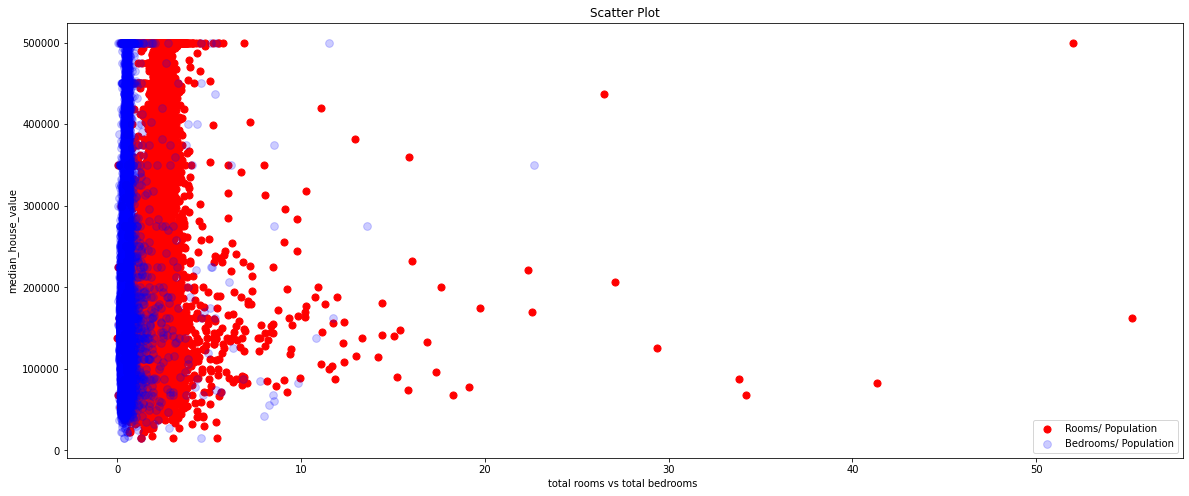

<Figure size 432x288 with 0 Axes>

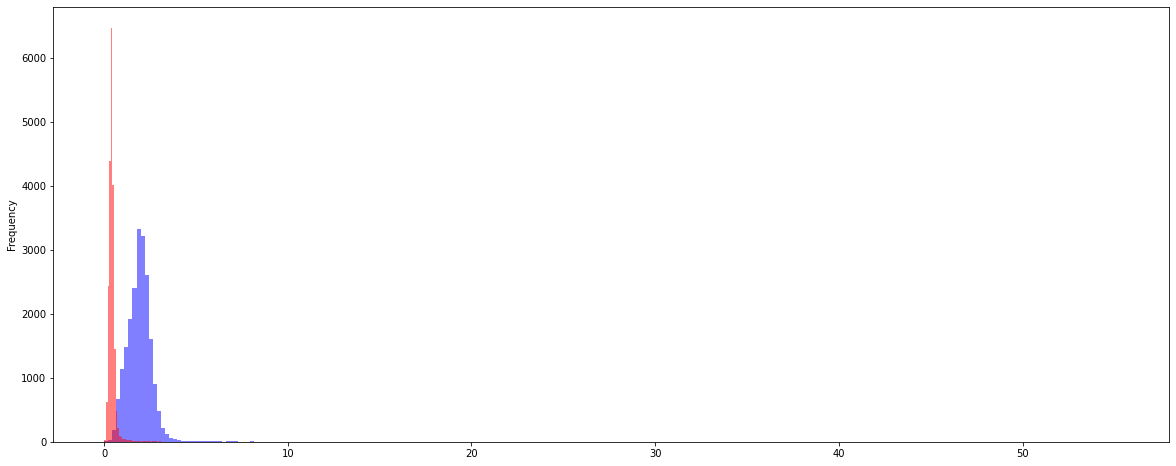

In [5]:
# lets try to normalize by both of the the columns. 

# First with the population column: 

normalized_room_pop = data['total_rooms']/data['population']
normalized_bed_pop = data['total_bedrooms']/data['population']


y = data['median_house_value']

# Create a scatter plot of the data
plt.figure()
plt.figure(figsize=(20, 8))
plt.scatter(normalized_room_pop, y, s=50, c='red',label='Rooms/ Population')
plt.scatter(normalized_bed_pop, y, s=60, c='blue',alpha=0.2,label='Bedrooms/ Population')

# Set the axis labels and title
plt.xlabel('total rooms vs total bedrooms ')
plt.ylabel('median_house_value')
plt.title('Scatter Plot')

plt.legend()
# Display the plot
plt.show()

plt.figure()
plt.figure(figsize=(20, 8))
normalized_room_pop.plot.hist(bins=250,color = 'blue',alpha=.5)
normalized_bed_pop.plot.hist(bins=250,color = 'red',alpha=.5)

plt.show()


<Figure size 432x288 with 0 Axes>

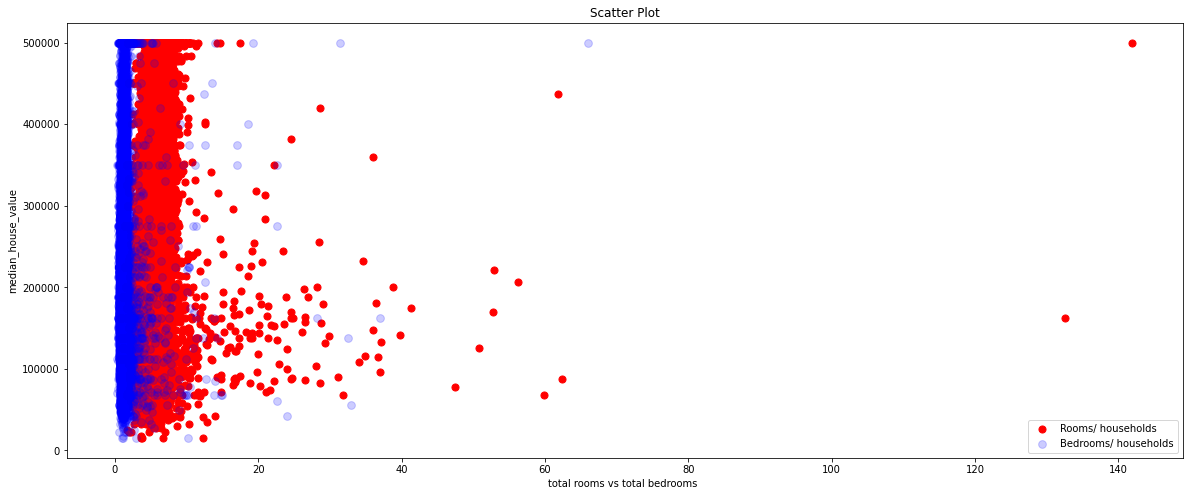

<Figure size 432x288 with 0 Axes>

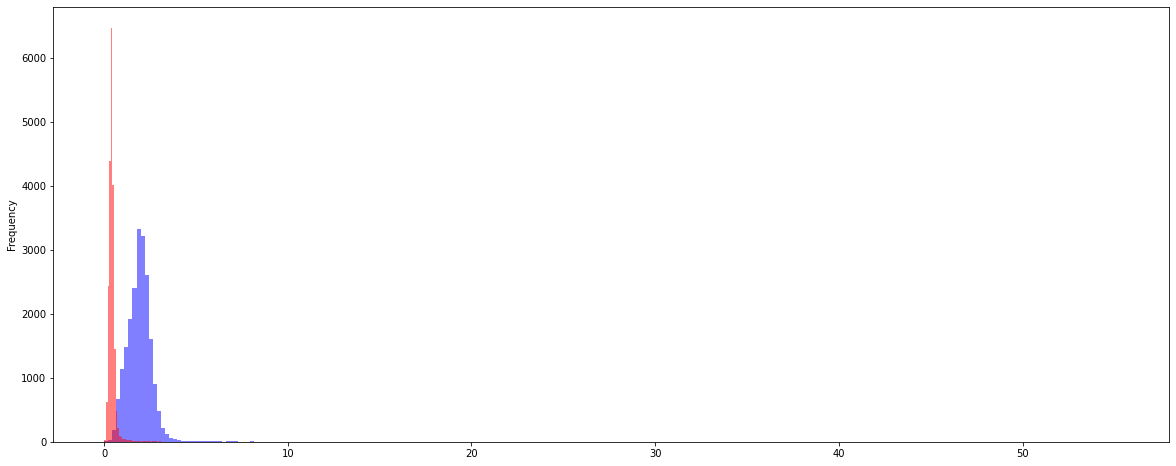

In [6]:
# Now with the households column: 

normalized_room_house = data['total_rooms']/data['households']
normalized_bed_house = data['total_bedrooms']/data['households']


y = data['median_house_value']

# Create a scatter plot of the data
plt.figure()
plt.figure(figsize=(20, 8))
plt.scatter(normalized_room_house, y, s=50, c='red',label='Rooms/ households')
plt.scatter(normalized_bed_house, y, s=60, c='blue',alpha=0.2,label='Bedrooms/ households')

# Set the axis labels and title
plt.xlabel('total rooms vs total bedrooms ')
plt.ylabel('median_house_value')
plt.title('Scatter Plot')

plt.legend()
# Display the plot
plt.show()

plt.figure()
plt.figure(figsize=(20, 8))
normalized_room_pop.plot.hist(bins=250,color = 'blue',alpha=.5)
normalized_bed_pop.plot.hist(bins=250,color = 'red',alpha=.5)

plt.show()

## **Answer 2:**

basicly i am going with the dividin both predictors by the household numbe , because that is the closets representation of a single living unit that could represent the houses in which the median house value outcome is being extracted from. 

# 3. Which of the seven variables is most *and* least predictive of housing value, from asimple linear regression perspective? [Hints: a) Make sure to use thestandardized/normalized variables from 2. above; b) Make sure to inspect the scatterplots and comment on a potential issue – would the best predictor be even more predictive if not for an unfortunate limitation of the data?]

In [17]:
# pre processing step 
from sklearn.preprocessing import MinMaxScaler

# normalizing the outcome variable
# Assuming the column to be normalized is stored in a NumPy array X
column_to_normalize = np.array(data['median_house_value'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
outcome = scaler.fit_transform(column_to_normalize.reshape(-1, 1)).reshape(-1,)  # Normalize the column

column_to_normalize = np.array(data['housing_median_age'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
median_age_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

column_to_normalize = np.array(normalized_room_house)  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
room_amount_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

column_to_normalize = np.array(normalized_bed_house)  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
bed_amount_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

column_to_normalize = np.array(data['population'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
pop_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

column_to_normalize = np.array(data['households'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
house_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

column_to_normalize = np.array(data['median_income'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
income_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

column_to_normalize = np.array(data['ocean_proximity'])  # Select the column you want to normalize
scaler = MinMaxScaler()          # Create a MinMaxScaler object
ocean_val = scaler.fit_transform(column_to_normalize.reshape(-1, 1))  # Normalize the column

In [35]:

# predicting using the median age of household

# x =np.array(data['housing_median_age']).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(median_age_val, outcome)
print("For Housing median age")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(median_age_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)


# x =np.array(normalized_room_house).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(room_amount_val, outcome)
print("For Room")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(room_amount_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)

# x =np.array(normalized_bed_house).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(bed_amount_val, outcome)
print("For bedrooms")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(bed_amount_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)

# x =np.array(data['population']).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(pop_val, outcome)
print("For population")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(pop_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)

# x =np.array(data['households']).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(house_val, outcome)
print("For household")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(house_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)

# x =np.array(data['median_income']).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(income_val, outcome)
print("For median_income")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(income_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)

# x =np.array(data['ocean_proximity']).reshape(-1,1)
# y = np.array(data['median_house_value'])
# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(ocean_val, outcome)
print("For ocean_proximity")
print("Model Coefficients: ", model.coef_)
y_pred = model.predict(ocean_val)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)


For Housing median age
Model Coefficients:  [0.10183655]
R-squared: 0.011156305266710742
For Room
Model Coefficients:  [2.06122039]
R-squared: 0.023088282755354017
For bedrooms
Model Coefficients:  [0.88413067]
R-squared: 0.003394278159693176
For population
Model Coefficients:  [-0.1847762]
R-squared: 0.0006076066693256887
For household
Model Coefficients:  [0.2491667]
R-squared: 0.0043352546340905684
For median_income
Model Coefficients:  [1.24951891]
R-squared: 0.47344749180719903
For ocean_proximity
Model Coefficients:  [-0.40051884]
R-squared: 0.15780848616855125


## **Answer 3:**

# 4. Putting all predictors together in a multiple regression model – how well do these predictors taken together predict housing value? How does this full model compare to the model that just has the single best predictor from 3. ?

In [34]:
from sklearn.metrics import r2_score

df = pd.DataFrame({"median_age_val":median_age_val.reshape(-1),
                   "room_amount_val":room_amount_val.reshape(-1),
                   "bed_amount_val":bed_amount_val.reshape(-1),
                   "pop_val":pop_val.reshape(-1),
                   "house_val":house_val.reshape(-1),
                   "income_val":income_val.reshape(-1),
                   "ocean_val":ocean_val.reshape(-1)})


model = LinearRegression()
model.fit(df, outcome)
print("For all predictors")
print("Model Coefficients: ", model.coef_)

y_pred = model.predict(df)

# Calculate the R-squared value
r2 = r2_score(outcome, y_pred)

# Print the R-squared value
print('R-squared:', r2)



For all predictors
Model Coefficients:  [ 1.32314107e-01 -1.80105033e-01 -2.52066596e-03 -2.76287798e+00
  1.62374437e+00  1.21301423e+00 -2.27765161e-01]
R-squared: 0.5991624107837809


## **Answer 4**

# 5. Considering the relationship between the (standardized) variables 2 and 3, is there potentially a concern regarding collinearity? Is there a similar concern regarding variables 4 and 5, if you were to include them in the model?


<AxesSubplot:>

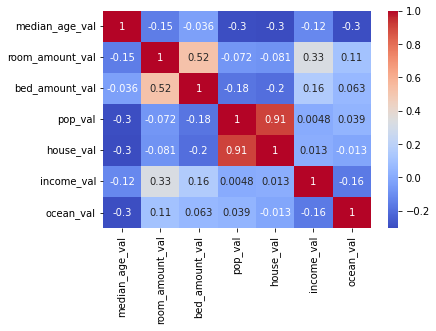

In [31]:
import pandas as pd
import seaborn as sns

# Load the dataset into a pandas DataFrame

# Create a correlation matrix using the corr() method
corr_matrix = df.corr()

# Use Seaborn's heatmap function to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## **Answer 5**

Unreliable coefficients: When predictor variables are highly correlated, it can be difficult to estimate the contribution of each variable to the outcome. This can lead to unstable or unreliable coefficient estimates, making it difficult to interpret the relationship between each predictor and the response variable.

Difficulty in interpreting coefficients: When predictor variables are highly correlated, the coefficients associated with those variables may have the opposite sign than expected. This makes it difficult to interpret the effect of each variable on the outcome.

Decreased predictive accuracy: Highly correlated predictor variables can lead to overfitting of the model, which can decrease its predictive accuracy. The model may fit the training data well but generalize poorly to new data.

Decreased statistical significance: When predictor variables are highly correlated, the standard errors of the coefficient estimates can be large, reducing the statistical significance of the coefficients. This makes it difficult to determine which variables are truly important in predicting the outcome.

Increased multicollinearity: High collinearity between predictor variables can also increase the multicollinearity of the model. Multicollinearity occurs when predictor variables are correlated with each other, making it difficult to determine their individual contributions to the outcome.

In summary, high collinearity between predictor variables in a multiple regression model can lead to unreliable coefficient estimates, decreased predictive accuracy, and decreased statistical significance. It's important to detect and address collinearity in the modeling process to ensure a more accurate and interpretable model.





Extra credit:

a) Does any of the variables (predictor or outcome) follow a distribution that can reasonablybe described as a normal distribution?

b) Examine the distribution of the outcome variable. Are there any characteristics of thisdistribution that might limit the validity of the conclusions when answering the questions above? If so, please comment on this characteristic.